#Lectura y procesamiento de los resultados de los mejores modelos MLP

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de MLP. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/mlp/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/mlp


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model


summaryModelsMLP2S = pd.read_excel('grilla_MLP_NARMAX_2STEPS.xlsx', header=0)
summaryModelsMLP4S = pd.read_excel('grilla_MLP_NARMAX_4STEPS.xlsx', header=0)
summaryModelsMLP8S = pd.read_excel('grilla_MLP_NARMAX_8STEPS.xlsx', header=0)
summaryModelsMLP16S = pd.read_excel('grilla_MLP_NARMAX_16STEPS.xlsx', header=0)

grilla_MLP_NARMAX_AQP = pd.concat([summaryModelsMLP2S, summaryModelsMLP4S], ignore_index=True)
grilla_MLP_NARMAX_AQP = pd.concat([grilla_MLP_NARMAX_AQP, summaryModelsMLP8S], ignore_index=True)
grilla_MLP_NARMAX_AQP = pd.concat([grilla_MLP_NARMAX_AQP, summaryModelsMLP16S], ignore_index=True)

grilla_MLP_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     2052 non-null   float64
 1   delayedSteps            2052 non-null   int64  
 2   nameModel               2052 non-null   object 
 3   nameHistory             2052 non-null   object 
 4   nameConfiguration       2052 non-null   object 
 5   timeTrain (in seconds)  2052 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 96.3+ KB


##La cantidad de modelos generados para el MLP NARX de AQP fue de 2052

In [5]:
rslt_df = grilla_MLP_NARMAX_AQP.sort_values('MAE')
total = grilla_MLP_NARMAX_AQP['timeTrain (in seconds)'].sum()
print(total)
grilla_MLP_NARMAX_AQP.describe()

169235.88


MAE  delayedSteps  timeTrain (in seconds)
count  2052.000000    2052.00000             2052.000000
mean      0.336775       7.50000               82.473626
std       0.078635       5.36321               31.594277
min       0.279559       2.00000               30.650000
25%       0.305158       3.50000               64.172500
50%       0.316259       6.00000               71.535000
75%       0.336093      10.00000               87.182500
max       1.000000      16.00000              350.830000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 169235, lo que equivale a 47 horas aproximadamente. Además se tienen las estadisticas resumen.

In [6]:
rslt_df.iloc[:50,:]

MAE  ...  timeTrain (in seconds)
1823  0.279559  ...                  134.70
2003  0.280058  ...                  130.22
2025  0.280664  ...                  124.78
2020  0.280707  ...                  127.73
2033  0.281050  ...                  125.52
1833  0.281227  ...                  131.04
2015  0.281590  ...                  130.50
2011  0.281764  ...                   56.45
2045  0.281940  ...                  123.52
2043  0.282259  ...                  124.76
1839  0.282773  ...                   55.80
1844  0.282780  ...                   51.75
2023  0.282881  ...                  123.99
2030  0.283244  ...                   57.17
1818  0.283472  ...                   52.98
1840  0.283535  ...                   55.36
2005  0.283546  ...                  122.70
2013  0.283662  ...                  130.45
2010  0.283772  ...                   56.46
2031  0.283997  ...                   55.97
2016  0.284048  ...                  127.77
1843  0.284094  ...                   51.99
1824  0.284129  ...                  132.75
2038  0.284238  ...                  130.47
1853  0.284361  ...                  131.30
2008  0.284434  ...                   57.29
2021  0.284818  ...                  129.51
1765  0.284877  ...                   59.44
1828  0.284981  ...                  140.29
2000  0.285127  ...                  136.59
1758  0.285259  ...                  144.98
2022  0.285655  ...                  121.97
2050  0.285693  ...                   56.06
2051  0.286008  ...                   55.83
2048  0.286173  ...                   56.80
1633  0.286277  ...                   60.68
1838  0.286491  ...                   57.75
1868  0.286566  ...                   50.20
2035  0.286872  ...                  125.73
2018  0.286987  ...                  132.28
2040  0.287468  ...                  125.66
1345  0.287514  ...                   81.49
2017  0.288045  ...                  128.46
1829  0.288073  ...                  135.04
1862  0.288169  ...                   63.05
2032  0.288190  ...                  141.89
1849  0.288458  ...                  136.52
1997  0.288941  ...                  133.93
1527  0.288975  ...                   90.77
1117  0.289175  ...                   58.27

[50 rows x 6 columns]

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAE                                                                0.279559
delayedSteps                                                             16
nameModel                 results/MLP_752_1_2_37640_sigmoidsigmoid_mean_...
nameHistory               results/MLP_752_1_2_37640_sigmoidsigmoid_mean_...
nameConfiguration         results/MLP_752_1_2_37640_sigmoidsigmoid_mean_...
timeTrain (in seconds)                                                134.7
Name: 1823, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/MLP_752_1_2_37640_sigmoidsigmoid_mean_absolute_error_sigmoid_16_history.npy
results/MLP_752_1_2_37640_sigmoidsigmoid_mean_absolute_error_sigmoid_16_config.npy
results/MLP_752_1_2_37640_sigmoidsigmoid_mean_absolute_error_sigmoid_16.h5


In [9]:
#para recuperar history
history=np.load('MLP_752_1_2_37640_sigmoidsigmoid_mean_absolute_error_sigmoid_16_history.npy',allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load('MLP_752_1_2_37640_sigmoidsigmoid_mean_absolute_error_sigmoid_16_config.npy',allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model('MLP_752_1_2_37640_sigmoidsigmoid_mean_absolute_error_sigmoid_16.h5')
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [0.27541637420654297, 0.261233389377594, 0.25040432810783386, 0.2396579384803772, 0.23168426752090454, 0.2217133492231369, 0.2147868275642395, 0.20819178223609924, 0.20088496804237366, 0.196077361702919, 0.18996131420135498, 0.18620242178440094, 0.18311184644699097, 0.17892391979694366, 0.17478783428668976, 0.17206059396266937, 0.1694761961698532, 0.16684190928936005, 0.16384536027908325, 0.16128215193748474, 0.15996070206165314, 0.15775375068187714, 0.15627652406692505, 0.15469302237033844, 0.15199512243270874, 0.150669664144516, 0.14912766218185425, 0.14846281707286835, 0.14677497744560242, 0.14566238224506378, 0.1442309021949768, 0.14380507171154022, 0.14238330721855164, 0.1418841928243637, 0.1412334144115448, 0.1404046267271042, 0.13906288146972656, 0.13807371258735657, 0.1367359757423401, 0.13640660047531128, 0.1353577822446823, 0.13447687029838562, 0.13426713645458221, 0.13297197222709656, 0.13239525258541107, 0.1315249353647232, 0.13097122311592102, 0.13128311932086945,

In [10]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledMLP.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledMLP.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxMLP.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxMLP.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF

def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

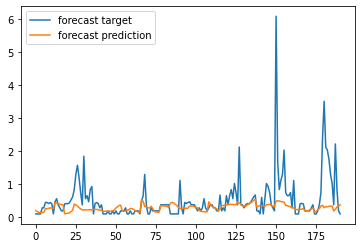

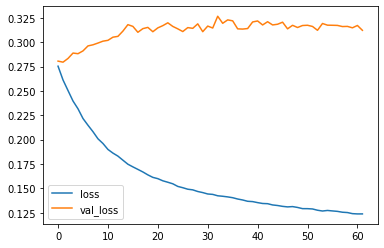

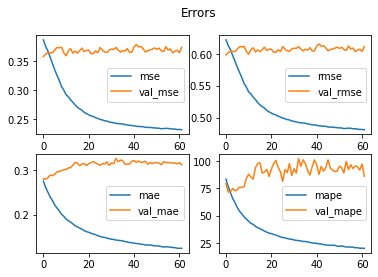

In [11]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
validation_predictions = saved_model.predict(testXScaled[:191,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)